In [28]:
data = pd.read_excel("./Admissions_CLEAN.xlsx")

In [29]:
data.columns

Index(['Ref ID', 'Entry Term', 'Tuition Percentage', 'Decision 1',
       'Decision 1 Confirmed Date', 'Decision 1 Released Date',
       'Decision 1 Received Date', 'Decision 2', 'Decision 2 Confirmed Date',
       'Decision 2 Released Date', 'Decision 2 Received Date', 'Decision 3',
       'Decision 3 Confirmed Date', 'Decision 3 Released Date',
       'Decision 3 Received Date', 'Sex', 'Birth State', 'Birth Country',
       'Age at App Submission', 'Race', 'URM', 'Native Language',
       'Have you ever failed a course?', 'Ever Placed on Academic Probation',
       'Academic Classes Taught in English', 'Institution 1 Name',
       'Institution 1 GPA (4.0 Scale)', 'Institution 2 Name',
       'Institution 2 GPA (4.0 Scale)', 'Institution 2 Class Rank',
       'Institution 3 Name', 'Institution 3 GPA (4.0 Scale)',
       'Institution 4 Name', 'Institution 4 GPA (4.0 Scale)',
       'GRE Verbal Percentile', 'GRE Quantitative Percentile',
       'GRE Analytical Writing Percentile', 'TOE

In [30]:
data = data[data["Decision Type"] != 4] # delete withdraw type
# UR decision
# admit:1 - deny:0
def func(x):
    admit_number = {12, 16, 2, 6, 10, 13, 15, 17, 19, 22, 23, 7, 9, 18, 20, 11, 14, 21}
    if x in admit_number:
        return 1
    else:
        return 0  
data["Admit"] = data["Decision Type"].apply(lambda x: func(x))

In [31]:
data['created_date'] = data['Created'].apply(lambda x: x.strftime('%m-%d'))
data['submitted_date'] = data['Submitted'].apply(lambda x: x.strftime('%m-%d'))

In [43]:
a = data.groupby(['created_date']).size()
b = data[data['Admit']==1].groupby(['created_date']).size()

In [44]:
c = (a.to_frame()).merge(b.to_frame(), left_on=a.index, right_on=b.index)
c

,key_0,0_x,0_y
0,01-01,21,11
1,01-02,32,15
2,01-03,28,10
3,01-04,32,9
4,01-05,28,8
...,...,...,...
224,12-27,29,11
225,12-28,30,15
226,12-29,28,12
227,12-30,32,11


In [45]:
c['percent'] = c.apply(lambda x: x['0_y']/x['0_x'], axis=1)
c.head()

,key_0,0_x,0_y,percent
0,01-01,21,11,0.523810
1,01-02,32,15,0.468750
2,01-03,28,10,0.357143
3,01-04,32,9,0.281250
4,01-05,28,8,0.285714


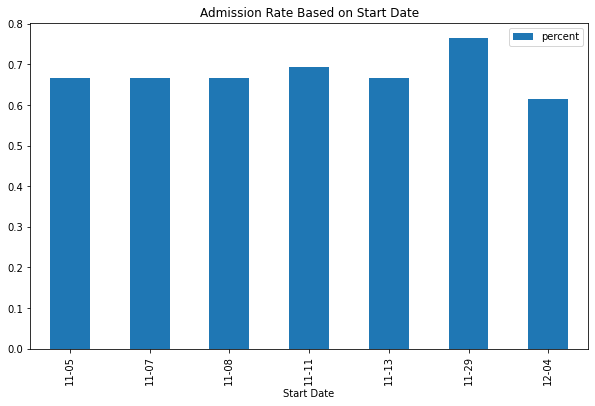

In [47]:
fig, ax = plt.subplots(figsize=(10,6))
c[(c['percent'] > 0.6)&((c['key_0']>'11-01')|(c['key_0']<'02-15'))].plot(kind='bar', ax=ax, x='key_0', y='percent')
plt.title("Admission Rate Based on Start Date")
plt.xlabel("Start Date")
plt.show()

In [36]:
a = data.groupby(['submitted_date']).size()
b = data[data['Admit']==1].groupby(['submitted_date']).size()
c = (a.to_frame()).merge(b.to_frame(), left_on=a.index, right_on=b.index)
c['percent'] = c.apply(lambda x: x['0_y']/x['0_x'], axis=1)
c.head()

,key_0,0_x,0_y,percent
0,01-01,25,14,0.560000
1,01-02,51,14,0.274510
2,01-03,63,29,0.460317
3,01-04,166,82,0.493976
4,01-05,256,98,0.382812


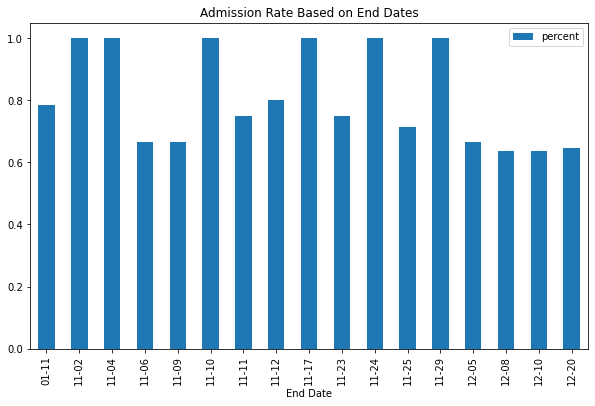

In [41]:
fig, ax = plt.subplots(figsize=(10,6))
c[(c['percent'] > 0.6)&((c['key_0']>'11-01')|(c['key_0']<'02-15'))].plot(kind='bar', ax=ax, x='key_0', y='percent')
plt.title("Admission Rate Based on End Dates")
plt.xlabel("End Date")
plt.show()